In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [3]:
df = pd.read_csv("Group_5_data_cleaned.csv")
df.head()

,Unnamed: 0,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),is_Winter,is_Spring,is_Summer,is_Autumn,is_Holiday,is_Functioning_day,Month,Day,int_date
0,0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,True,False,False,False,False,True,12.0,0,43068.0
1,1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,True,False,False,False,False,True,12.0,0,43068.0
2,2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,True,False,False,False,False,True,12.0,0,43068.0
3,3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,True,False,False,False,False,True,12.0,0,43068.0
4,4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,True,False,False,False,False,True,12.0,0,43068.0


In [4]:
df = df.drop(['Unnamed: 0'],axis=1)

In [5]:
X = df.drop('Rented Bike Count',axis=1)
y = df['Rented Bike Count']

In [6]:
#Min Max scaling 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler 
from sklearn.metrics import r2_score

scaler = MinMaxScaler()
model=scaler.fit(X)
scaled_X=model.transform(X)

y = y.values.reshape(-1, 1)
model1=scaler.fit(y)
scaled_y=model1.transform(y)

In [7]:
#splitting data into train,validation and test datasets
X_train, X_rem, y_train, y_rem = train_test_split(scaled_X,scaled_y, train_size=0.80,random_state=42)

In [8]:
test_size = 0.5
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5,random_state=42)

In [9]:
# shapes of train,validation and  test split
print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(7008, 17)
(7008, 1)
(876, 17)
(876, 1)
(876, 17)
(876, 1)


(None, None)

In [10]:
kneighbor_regression = KNeighborsRegressor(n_neighbors=7)
kneighbor_regression.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=7)

In [11]:
y_pred_test = kneighbor_regression.predict(X_test)

In [12]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_pred_test, y_test)
print("MSE:", mse)

MSE: 0.005507682254778643


In [13]:
kneighbor_regression.score(X_test, y_test)

0.817092337976948

In [14]:
y_train_pred = kneighbor_regression.predict(X_train)
MSE = metrics.mean_squared_error(y_train_pred, y_train)
MAE =  metrics.mean_absolute_error(y_train_pred, y_train)
RMSE = MSE**0.5
print(f"The mean squared error is {MSE}")
print(f"The mean absolute error is {MAE}")
print(f"The root mean sqaured error is {RMSE}")

The mean squared error is 0.003874529568317226
The mean absolute error is 0.03940773571050683
The root mean sqaured error is 0.06224571927704929


In [15]:
y_valid_pred = kneighbor_regression.predict(X_valid)
MSE = metrics.mean_squared_error(y_valid_pred, y_valid)
MAE =  metrics.mean_absolute_error(y_valid_pred, y_valid)
RMSE = MSE**0.5
print(f"The mean squared error is {MSE}")
print(f"The mean absolute error is {MAE}")
print(f"The root mean sqaured error is {RMSE}")

The mean squared error is 0.006463276424127586
The mean absolute error is 0.05023862905101638
The root mean sqaured error is 0.08039450493738727


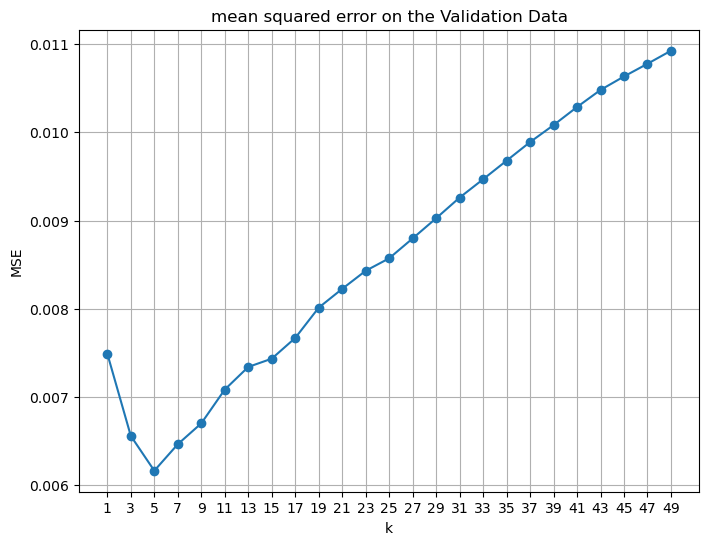

In [16]:
k_values = []
mse_error = []

for k in range(1, 50, 2):
    model = KNeighborsRegressor(n_neighbors = k)
    model.fit(X_train, y_train)
    y_valid_pred = model.predict(X_valid)
    mse_error.append(metrics.mean_squared_error(y_valid_pred, y_valid))
    k_values.append(k)


plt.figure(figsize = (8, 6))

plt.plot(k_values, mse_error, marker = "o")
plt.title("mean squared error on the Validation Data")
plt.xlabel("k")
plt.ylabel("MSE")
plt.xticks(k_values)
plt.grid();

# We got least MSE at k=5

In [17]:
y_test_pred = kneighbor_regression.predict(X_test)
MSE = metrics.mean_squared_error(y_test_pred, y_test)
MAE =  metrics.mean_absolute_error(y_test_pred, y_test)
RMSE = MSE**0.5
print(f"The mean squared error is {MSE}")
print(f"The mean absolute error is {MAE}")
print(f"The root mean sqaured error is {RMSE}")

The mean squared error is 0.005507682254778643
The mean absolute error is 0.047969969996411906
The root mean sqaured error is 0.07421376054869235


R^2 is 0.817092337976948
RMSE is: 0.07421376054869235


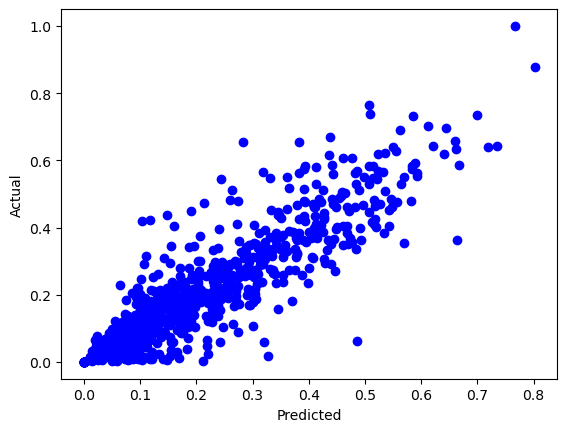

In [18]:
plt.scatter(y_test_pred,y_test,color='b')
plt.xlabel('Predicted')
plt.ylabel('Actual')
print(f'R^2 is {kneighbor_regression.score(X_test,y_test)}\nRMSE is: {metrics.mean_squared_error(y_test_pred,y_test,squared=False)}')

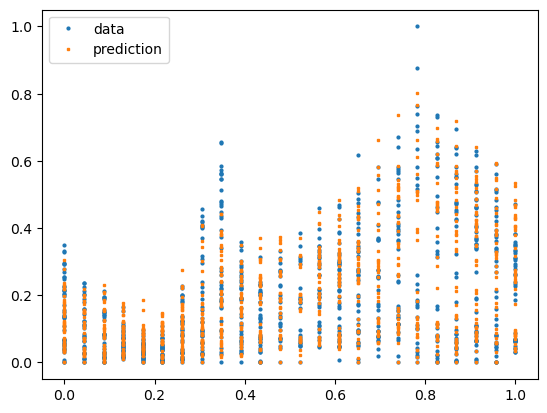

In [19]:
plt.plot(X_test[:,0], y_test, 'o', label="data", markersize=2)
plt.plot(X_test[:,0], y_test_pred, 's', label="prediction", markersize=2)
plt.legend(loc='best');

# Finding best parameters using randomized search

In [20]:
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV

In [21]:
cv_scores = cross_val_score(KNeighborsRegressor(n_neighbors=10), 
                            X_train, 
                            y_train, 
                            cv=5, # no shuffle, stratified for classifiers, default value 5
                            #cv=KFold(n_splits=5, shuffle=True), 
                            #cv=StratifiedKFold(n_splits=5, shuffle=True),
                            #cv=RepeatedKFold(n_splits=5, n_repeats=3),
                            )

cv_scores

array([0.7960432 , 0.80970432, 0.81559943, 0.8090781 , 0.802529  ])

In [22]:
rs = RandomizedSearchCV(estimator = KNeighborsRegressor(),
                        param_distributions = {"n_neighbors": range(1,25),
                                               "weights": ['uniform', 'distance'],
                                               "p": [1,2]},
                        cv=5,
                        n_iter=10)

rs.fit(X_train, y_train)

rs.best_score_

0.8405423653491066

In [23]:
rs.best_params_

{'weights': 'uniform', 'p': 1, 'n_neighbors': 2}

In [24]:
best_rs = KNeighborsRegressor(weights= 'distance', p= 1, n_neighbors= 5)
best_rs.fit(X_train,y_train)
filename = 'knnregressor.pkl'
pickle.dump(best_rs, open(filename, 'wb'))

In [25]:
#rs best model on validation set 
y_valid_pred =  best_rs.predict(X_valid)
MSE = metrics.mean_squared_error(y_valid_pred, y_valid)
MAE =  metrics.mean_absolute_error(y_valid_pred, y_valid)
RMSE = MSE**0.5
print(f"The mean squared error is {MSE}")
print(f"The mean absolute error is {MAE}")
print(f"The root mean sqaured error is {RMSE}")

The mean squared error is 0.0049692085498304036
The mean absolute error is 0.0423351692258498
The root mean sqaured error is 0.07049261344162525


In [26]:
#best model on the test data set
y_test_pred = best_rs.predict(X_test)
MSE = metrics.mean_squared_error(y_test_pred, y_test)
MAE =  metrics.mean_absolute_error(y_test_pred, y_test)
RMSE = MSE**0.5
print(f"The mean squared error is {MSE}")
print(f"The mean absolute error is {MAE}")
print(f"The root mean sqaured error is {RMSE}")

The mean squared error is 0.004170228416998338
The mean absolute error is 0.040040763229760315
The root mean sqaured error is 0.06457730574279434
